# Collecting metrics from single lines

Leanne Friedrich 7/22/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
import py.fileHandling as fh
from py.config import cfg
import py.logs as logs
import py.vidplots as vp
import py.metrics as me
LOGGERDEFINED = logs.openLog('vidplots.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# measuring stills

## measure all stills

In [ ]:
# for s in ['LapRD LapRD 3day']:
ftop = os.path.join(cfg.path.server, 'singleLines')
me.measureStillsRecursive(ftop, overwrite=True, overwriteList=['vert', 'horiz', 'xs'])

INFO: Measuring I_2.25_S_2.25_210727
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.25\I_2.25_S_2.25_210727\I_2.25_S_2.25_210727_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.25\I_2.25_S_2.25_210727\I_2.25_S_2.25_210727_horizSummary.csv
INFO: Measuring I_2.25_S_2.50_210727
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50\I_2.25_S_2.50_210727\I_2.25_S_2.50_210727_xsSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50\I_2.25_S_2.50_210727\I_2.25_S_2.50_210727_horizSummary.csv
INFO: Measuring I_2.25_S_2.75_210727
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.75\I_2.25_S_2.75_210727\I_2.25_S_2.75_210727_xsSummary.csv
INFO: Ex

## measure one folder

In [240]:
file = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 1day\I_2.25_S_3.00\I_2.25_S_3.00_210727')
me.measureStills(file)

INFO: Measuring I_2.25_S_3.00_210727


## diagnostics

In [3]:
# i = '2.25'
# s = '2.25'
# folder = os.path.join(cfg.path.server, r'singleLines\LapRD LapRD 3day',f'I_{i}_S_{s}', f'I_{i}_S_{s}_210517')
folder = os.path.join(cfg.path.server, r'singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_5_VS_10_210824')
me.checkAndDiagnoseRecursive(folder, redo=False)

INFO: Problems detected in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_5_VS_10_210824


,code,description,value,st
0,3,Missing # xs lines,"[1, 2, 3, 4, 5]",xs


In [357]:
r,_ = me.stillsSummary(folder, '', filename='empty.csv')
display(r[['bn', 'xs_aspect', 'xs_aspect_SE', 'xs_areaN', 'xs_areaN_SE', 'xs_roughness']])

INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels mineral LapRD\I_M6_S_3.00\I_M6_S_3.00_VI_2.5_VS_10_210824


,line,aspect,xshift,yshift,area,x0,y0,w,h,xc,yc,roughness
0.0,1.0,0.912281,0.007830,-0.001482,2310.0,333.0,829.0,57.0,52.0,361.946320,854.922944,0.002019
1.0,2.0,1.078431,-0.013103,-0.010580,2235.0,329.0,826.0,51.0,55.0,353.831767,852.918121,0.596487
2.0,3.0,0.931034,-0.007840,-0.043390,2364.0,332.0,831.0,58.0,54.0,360.545262,855.656937,0.006325
3.0,4.0,0.983607,-0.003790,-0.009292,2902.0,327.0,822.0,61.0,60.0,357.268780,851.442453,0.000000


,bn,xs_aspect,xs_aspect_SE,xs_areaN,xs_areaN_SE,xs_roughness
0,I_M6_S_3.00_VI_2.5_VS_10_210824,0.976338,0.037229,3.930545,0.262452,0.151208


removed borders
segment 1
measure 0
measure component
0 337
measure 1
measure component
0 587
measure 2
measure component
0 648
measure component
0 55


(   line  segments       maxlen       totlen       maxarea       totarea  \
 0     0         1  1123.333333  1123.333333  48700.000000  48700.000000   
 1     1         1  1956.666667  1956.666667  68166.666667  68166.666667   
 2     2         2  2160.000000  2343.333333  72688.888889  89600.000000   
 
    roughness      meanT    stdevT   minmaxT          vest  
 0   0.086101  43.353116  0.351738  1.383984  1.636877e+06  
 1   0.014474  34.838160  0.264163  1.148166  1.854095e+06  
 2   0.112876  33.652263  0.734787  4.259248  2.074286e+06  ,
 {'line': '',
  'segments': '',
  'maxlen': 'px',
  'totlen': 'px',
  'maxarea': 'px',
  'totarea': 'px',
  'roughness': '',
  'meanT': 'px',
  'stdevT': 'meanT',
  'minmaxT': 'meanT',
  'vest': 'px^3'})

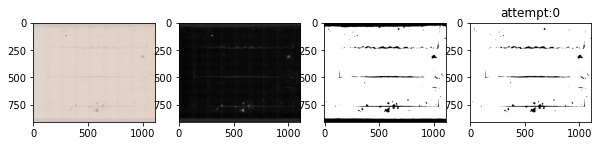

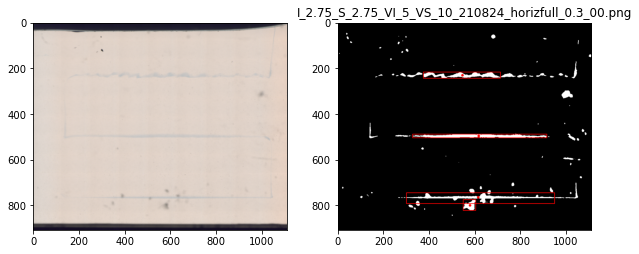

In [27]:
me.measure1Line(os.path.join(folder), 'horiz', 2, diag=2)

INFO: Measuring I_2.75_S_2.75_VI_5_VS_10_210824
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_5_VS_10_210824\I_2.75_S_2.75_VI_5_VS_10_210824_vertSummary.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\vels LapRD LapRD 1day\I_2.75_S_2.75\I_2.75_S_2.75_VI_5_VS_10_210824\I_2.75_S_2.75_VI_5_VS_10_210824_horizSummary.csv


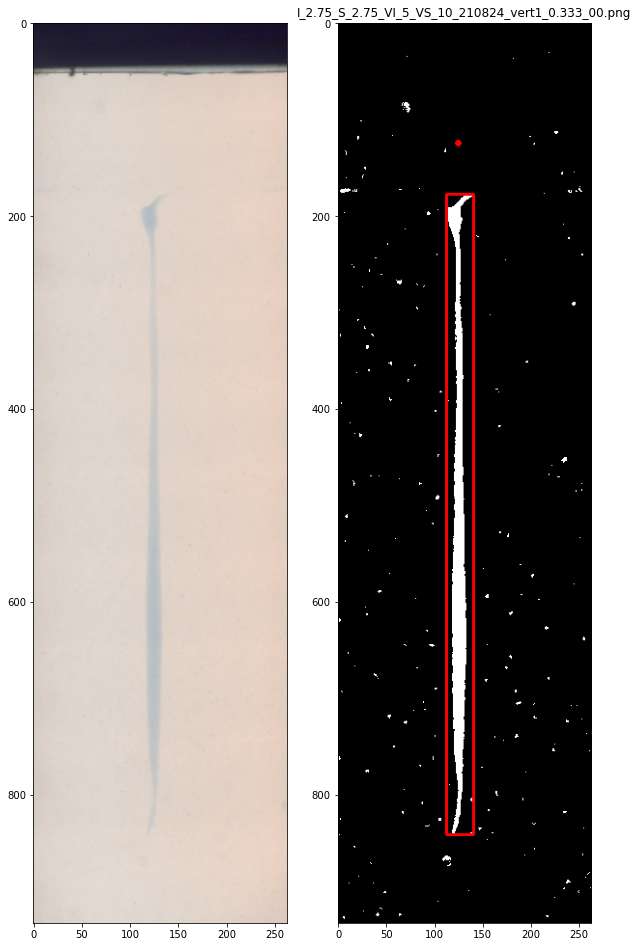

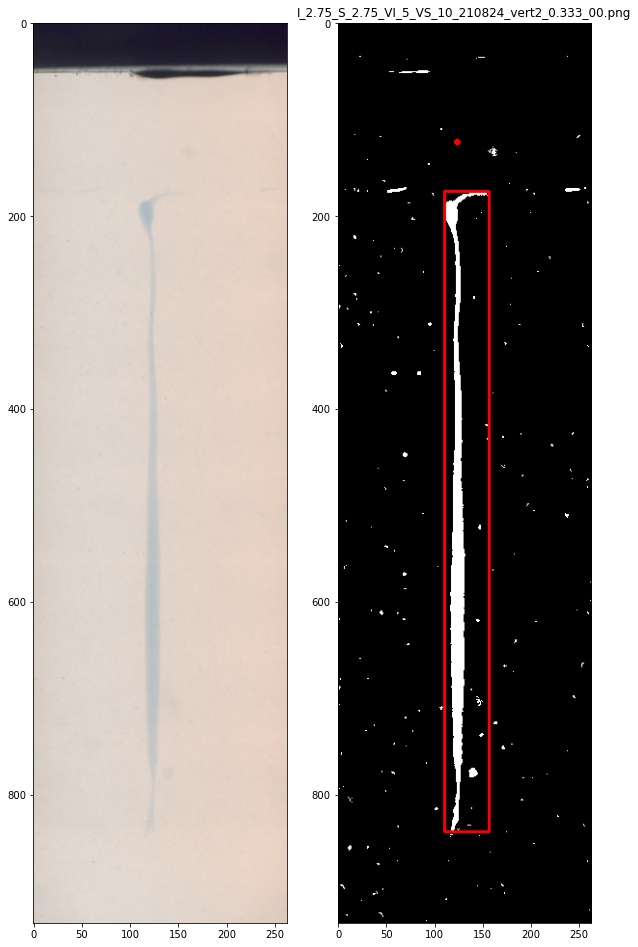

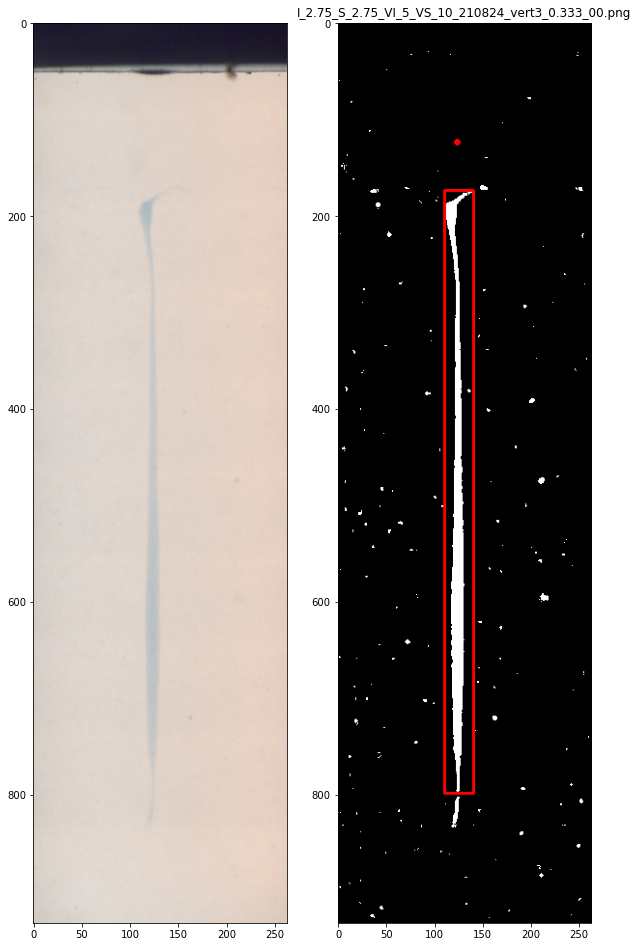

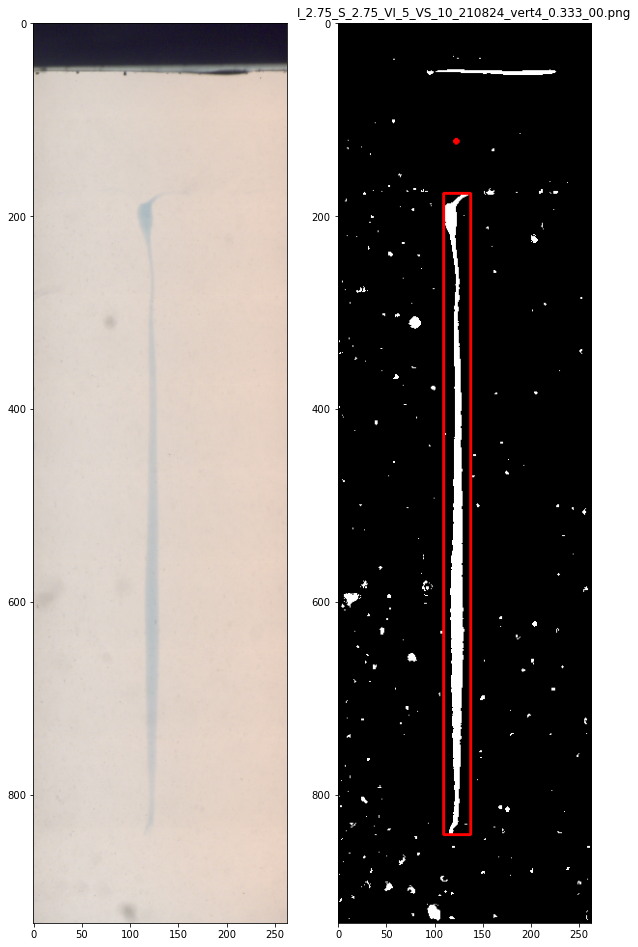

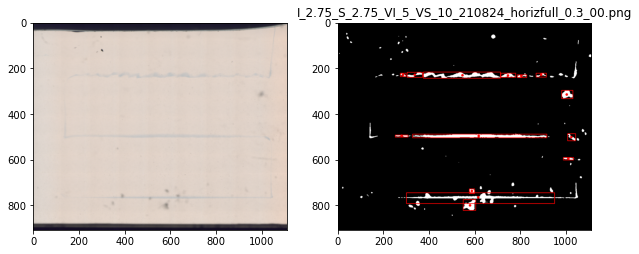

In [124]:
me.measureStillsRecursive(folder, overwrite=True, diag=1)

In [33]:
import cv2 as cv
import numpy as np
import vidMorph as vm
import vidCrop as vc
from imshow import imshow

In [34]:
fl.xs1Stitch[0]

'//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\\vels LapRD LapRD 1day\\I_2.75_S_2.75\\I_2.75_S_2.75_VI_5_VS_10_210824\\I_2.75_S_2.75_VI_5_VS_10_210824_xs1_1_00.png'

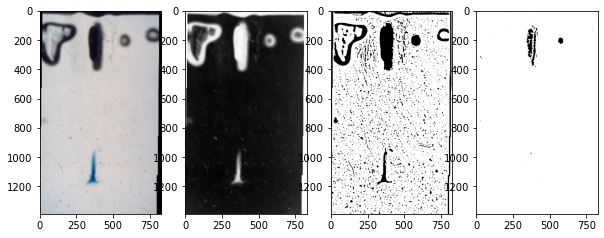

In [188]:
fl = me.fileList(folder)
im = cv.imread(fl.xs4Stitch[0])
# im = vc.imcrop(im, 10)
im0 = im
im0[0, 0] = np.zeros(im0[0, 0].shape)
img = im0
if len(img.shape)==3:
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
else:
    gray = img.copy()
gray = cv.medianBlur(gray, 5)
thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
filled = vm.fillComponents(thresh)
thresh = cv.add(255-thresh,filled)
imshow(img, gray, thresh, filled)

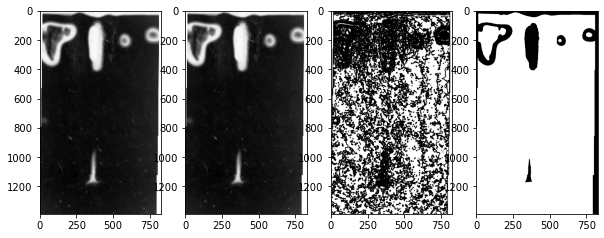

In [189]:
norm = np.zeros(gray.shape)
final = cv.normalize(gray,  norm, 0, 255, cv.NORM_MINMAX)
edge = cv.Canny(final, 5, 15)
edge = vm.dilate(edge, 5)
t2 = vm.threshes(im, gray, True, 0)

imshow(gray, final, edge, t2)

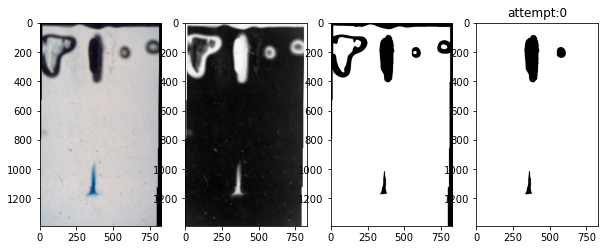

In [192]:
im2, markers, attempt = vm.segmentInterfaces(im, attempt0=0, acrit=100, diag=2)

In [196]:
import pandas as pd

In [203]:
df = pd.DataFrame(markers[2], columns=['x0', 'y0', 'w','h','a'])
df2 = pd.DataFrame(markers[3], columns=['xc','yc'])
df = pd.concat([df, df2], axis=1)
df

,x0,y0,w,h,a,xc,yc
0,0,0,828,1387,1116064,413.856073,703.603989
1,328,88,104,323,25218,380.077048,241.616108
2,548,169,62,75,3808,577.533876,207.017595
3,332,1011,48,162,3346,359.949193,1111.078302


array([[ 413.85607277,  703.60398866],
       [ 380.07704814,  241.61610754],
       [ 577.53387605,  207.01759454],
       [ 359.94919307, 1111.07830245]])

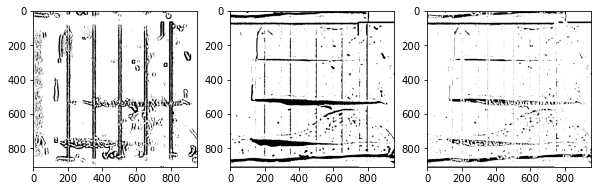

In [157]:
sobel_y = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1],[-1, 0, 1],[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filtered_image_y = cv.filter2D(gray, -1, sobel_y)
filterthres = 255-cv.adaptiveThreshold(filtered_image_y,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
filterthres = vm.closeMorph(filterthres,2)
imshow(filterthres, thresh, cv.subtract(thresh,filterthres))

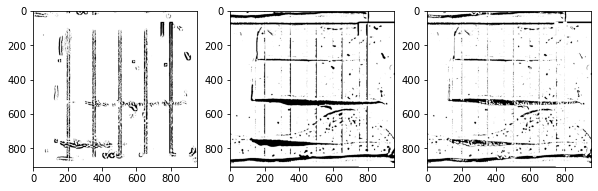

In [158]:
sobel_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filtered_image_y = cv.filter2D(gray, -1, sobel_y)
filterthres = 255-cv.adaptiveThreshold(filtered_image_y,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
filterthres = vm.closeMorph(filterthres,2)
imshow(filterthres, thresh, cv.subtract(thresh,filterthres))

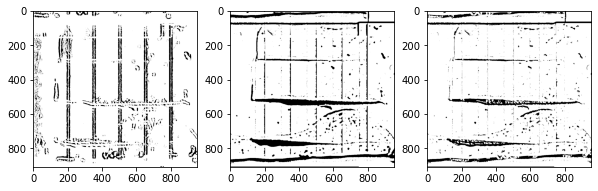

In [176]:
sobel_y = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1], [-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filtered_image_y = cv.filter2D(gray, -1, sobel_y)
filterthres = 255-cv.adaptiveThreshold(filtered_image_y,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1,2, 1]])
filtered_image_x = cv.filter2D(gray, -1, sobel_x)
filterthres2 = 255-cv.adaptiveThreshold(filtered_image_x,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,21,2)
filterthres = cv.subtract(filterthres,filterthres2)
filterthres = vm.closeMorph(filterthres,2)
imshow(filterthres, thresh, cv.subtract(thresh,filterthres))

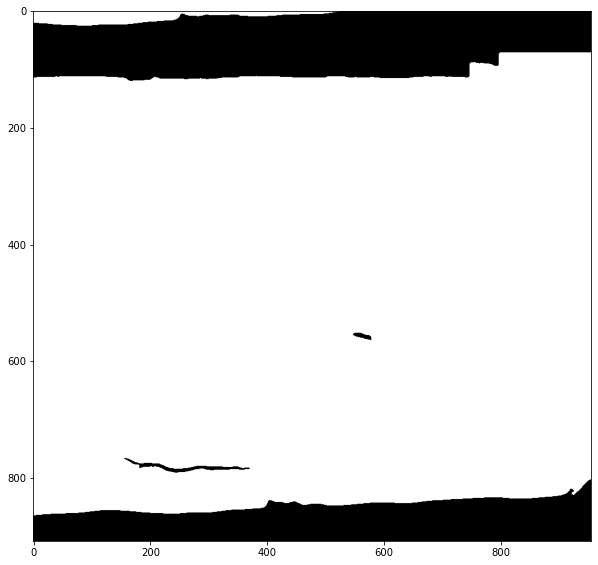

In [187]:
r,t=cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
imshow(t)